In [14]:
import pandas as pd
import numpy as np
import json
from shapely.geometry import shape, Point
import geopandas as gpd
import seaborn as sns
df_z = pd.io.parsers.read_csv('zipcode.csv', dtype={'Zipcode': 'str'})

In [15]:
df_z = df_z[['Lat_Lon','Zipcode']]

In [16]:
df = pd.io.parsers.read_csv('NYPD_Motor_Vehicle_Collisions.csv', dtype={'ZIP CODE': 'str'})

In [17]:
data = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

//anaconda/envs/hw6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
df_merged = pd.io.parsers.read_csv('merged.csv', dtype={'Zipcode': 'str'})

//anaconda/envs/hw6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
df1 = df['ZIP CODE'].value_counts().reset_index().rename(columns={'index': 'Zipcode', 'ZIP CODE': 'Count'})
df2 = df_merged['Zipcode'].value_counts().reset_index().rename(columns={'index': 'Zipcode', 'Zipcode': 'Count'})

In [20]:
df_combine = df1.merge(df2, how='outer', on='Zipcode').rename(columns={'Count_x': 'Freq_Colli', 'Count_y': 'Freq_Crime'})

In [21]:
df_combine.to_csv('combine.csv')

In [22]:
df_combine.head()

,Zipcode,Freq_Colli,Freq_Crime
0,11207,13236.0,90879.0
1,11101,10815.0,31349.0
2,10016,10626.0,26443.0
3,10022,10460.0,24736.0
4,10019,10444.0,42245.0


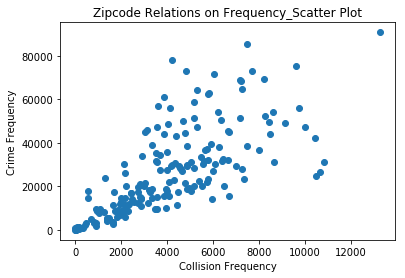

In [28]:
import matplotlib.pyplot as plt
plt.scatter(df_combine['Freq_Colli'], df_combine['Freq_Crime'])
plt.title('Zipcode Relations on Frequency_Scatter Plot')
plt.xlabel('Collision Frequency')
plt.ylabel('Crime Frequency')
plt.show()

In [25]:
with open('NYC zip code.geojson') as f:
    js = json.load(f)

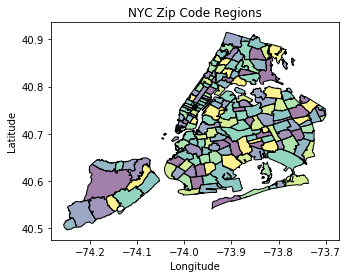

In [27]:
gpd.read_file('NYC zip code.geojson').plot()
plt.title('NYC Zip Code Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

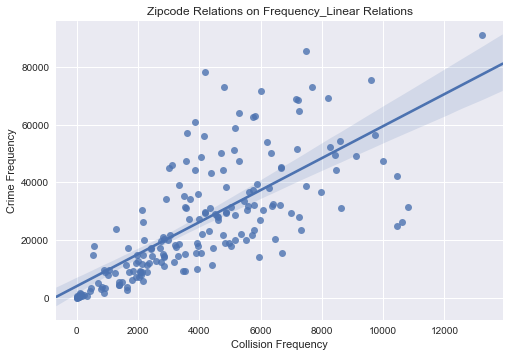

In [29]:
sns.regplot(x=df_combine['Freq_Colli'],y=df_combine['Freq_Crime'],data=df_combine)
plt.title('Zipcode Relations on Frequency_Linear Relations')
plt.xlabel('Collision Frequency')
plt.ylabel('Crime Frequency')
plt.show()

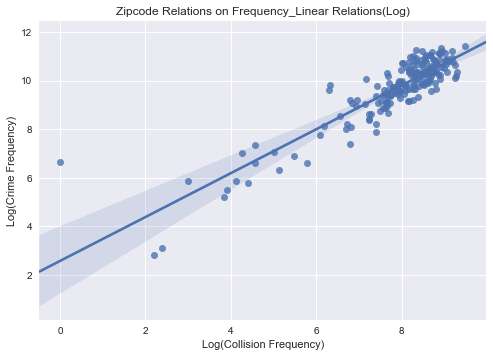

In [31]:
sns.regplot(x=np.log(df_combine['Freq_Colli']),y=np.log(df_combine['Freq_Crime']),data=df_combine)
plt.title('Zipcode Relations on Frequency_Linear Relations(Log)')
plt.xlabel('Log(Collision Frequency)')
plt.ylabel('Log(Crime Frequency)')
plt.show()